 ## Titanic Data Set- This is a raw file, may update it later

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:ylabel='Frequency'>

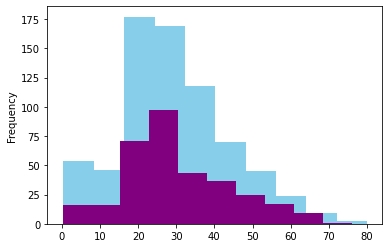

In [7]:
train.Age.plot.hist(color = "skyblue")
test.Age.plot.hist(color = "Purple")



 ## Data Analysis for missing values

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

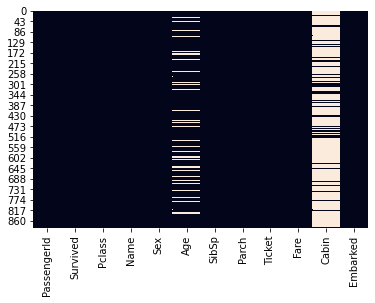

In [9]:
sns.heatmap(train.isnull(), cbar = False)

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
df_bin = pd.DataFrame()  ## discretized continuous variable
df_con = pd.DataFrame()  ## for continuous variable

In [13]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64

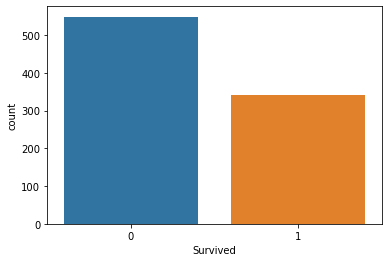

In [15]:
#People Survived
#fig.plt.figure(figsize = (20,1))
sns.countplot(x = 'Survived', data= train);
train.Survived.value_counts()

In [16]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [17]:
df_bin.head(15)


,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [18]:
df_con.head(15)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


## Pclass 
 1st- class
 2nd- class
 3rd- class

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

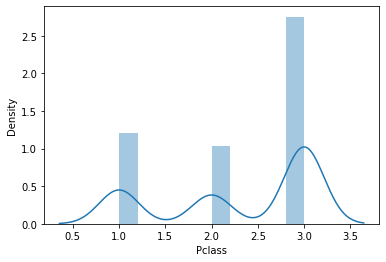

In [19]:
sns.distplot(train.Pclass)

In [20]:
train.Pclass.isnull().sum()

0

In [21]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

## Name

In [22]:
train.Name.value_counts()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#train.Name.isnull().sum()
train.drop('Name', axis = 1, inplace = True)

In [24]:

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Sex

In [25]:
train.Sex.isnull().sum()

0

<AxesSubplot:>

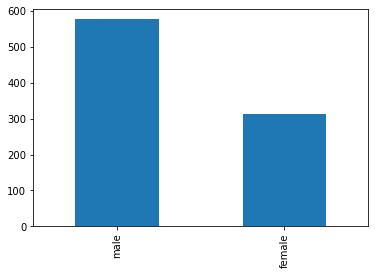

In [26]:
train['Sex'].value_counts().plot.bar()

In [27]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(train['Sex']=='female', 1,0)
df_con['Sex'] = train['Sex']


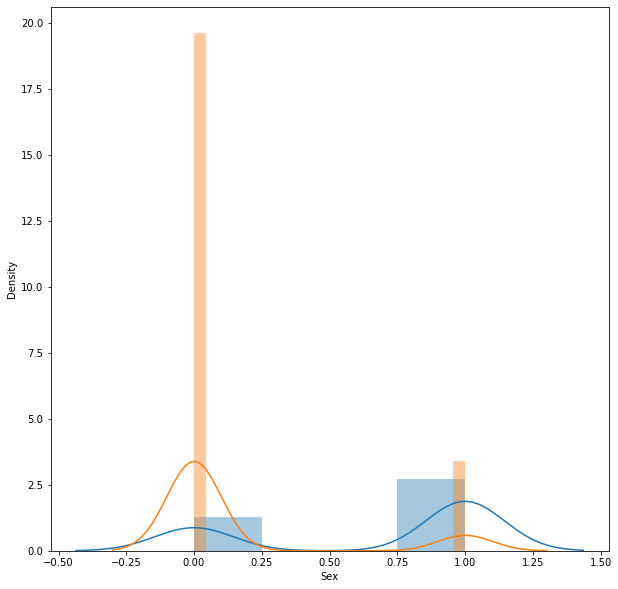

In [28]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});


## Age

In [29]:
train.Age.isnull().sum()

177

In [30]:
train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [31]:
def impute_nan(df, variable, median):
    train[variable +'_median']= train[variable].fillna(median, inplace = True)

In [32]:
median = train.Age.median()
median

28.0

In [33]:
impute_nan(train, "Age", median )
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,None
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,None
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,None
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,None
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,None
5,6,0,3,male,28.0,0,0,330877,8.4583,NaN,Q,None
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,None
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,None
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,None
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,None


In [34]:
df_bin['Age'] = pd.cut(train['Age'],10)

df_con['Age'] = train['Age']

In [35]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,None
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,None
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,None
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,None
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,None
5,6,0,3,male,28.0,0,0,330877,8.4583,NaN,Q,None
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,None
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,None
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,None
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,None


## SibSp

In [36]:
train.SibSp.value_counts().isnull().sum()

0

In [37]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

## Parch

In [38]:
train.Parch.value_counts().isnull().sum()

0

In [39]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [40]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,None
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,None
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,None
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,None
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,None
5,6,0,3,male,28.0,0,0,330877,8.4583,NaN,Q,None
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,None
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,None
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,None
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,None


In [41]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


## Ticket

In [42]:
train.Ticket.isnull().sum()

0

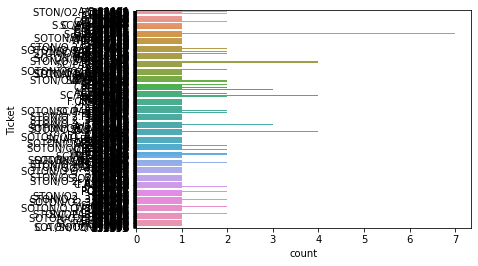

In [43]:
sns.countplot(y = 'Ticket', data = train);

In [44]:
train.Ticket.value_counts()

347082               7
CA. 2343             7
1601                 7
347088               6
3101295              6
                    ..
C.A./SOTON 34068     1
28134                1
4134                 1
363592               1
STON/O 2. 3101292    1
Name: Ticket, Length: 681, dtype: int64

In [45]:
print("There are {} unique Ticket vlaues".format(len(train.Ticket.unique())))

There are 681 unique Ticket vlaues


In [46]:
train.drop('Ticket', axis = 1, inplace = True)

In [47]:
#df_bin['Ticket'] = train['Ticket']
#df_con['Ticket'] = train['Ticket']




## Fare

In [48]:
train.Fare.isnull().sum()

0

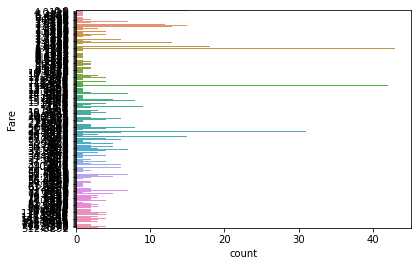

In [49]:
sns.countplot(y = 'Fare', data = train);

In [50]:
train.Fare.dtype

dtype('float64')

In [51]:
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [52]:
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] =pd.cut(train['Fare'], bins=5)

In [53]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

## Cabin

In [54]:
train.Cabin.isnull().sum()

687

In [55]:
train.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [56]:
len(train['Cabin'].unique())

148

In [57]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [58]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
E101           3
              ..
B73            1
A20            1
C87            1
D47            1
B38            1
Name: Cabin, Length: 147, dtype: int64

In [59]:
#train.Cabin = train.Cabin.fillna("U")
#train.head()
train.drop('Cabin', axis = 1, inplace = True)

In [60]:
#df_con['Cabin'] = train['Cabin'] 
#df_bin['Cabin'] = train['Cabin']

In [61]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_median
0,1,0,3,male,22.0,1,0,7.2500,S,None
1,2,1,1,female,38.0,1,0,71.2833,C,None
2,3,1,3,female,26.0,0,0,7.9250,S,None
3,4,1,1,female,35.0,1,0,53.1000,S,None
4,5,0,3,male,35.0,0,0,8.0500,S,None


## Embarked

In [62]:
train.Embarked.isnull().sum()

2

In [63]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

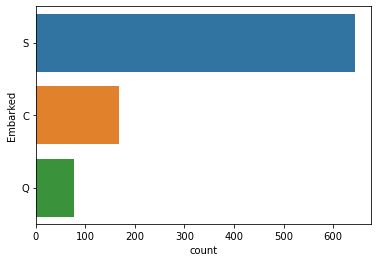

In [64]:
sns.countplot(y = 'Embarked', data= train);

In [65]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [66]:
print(len(df_con))
df_con = df_con.dropna(subset = ['Embarked'])
df_in = df_bin.dropna(subset= ['Embarked'])
print(len(df_con))



891
889


## Feature Encoding

In [67]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,"(16.336, 24.294]",1,0,"(-0.512, 102.466]",S
1,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",C
2,1,3,1,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",S
3,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",S
4,0,3,0,"(32.252, 40.21]",0,0,"(-0.512, 102.466]",S


In [68]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')

df_bin_enc = pd.get_dummies(df_bin, columns = one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,"Age_(0.34, 8.378]","Age_(8.378, 16.336]","Age_(16.336, 24.294]","Age_(24.294, 32.252]",...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [69]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [70]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [71]:
df_pclass_one_hot = pd.get_dummies(df_con['Pclass'], prefix = 'pclass')
#df_name_one_hot = pd.get_dummies(df_con['Name'], prefix = 'name')
df_sex_one_hot = pd.get_dummies(df_con['Sex'], prefix = 'sex')
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], prefix = 'embraked')
#df_cabin_one_hot = pd.get_dummies(df_con['Cabin'], prefix = 'cabin')
#df_ticket_one_hot = pd.get_dummies(df_con['Ticket'], prefix = 'ticket')

In [72]:
df_con_enc = pd.concat([df_con,df_pclass_one_hot,
    #df_name_one_hot,
    df_sex_one_hot,
    df_embarked_one_hot,
    #df_cabin_one_hot,
    #df_ticket_one_hot
                       ], axis =1)
df_con_enc = df_con_enc.drop(['Pclass', #'Name',
                                'Sex',
                                'Embarked',
                                #'Cabin',
                                #'Ticket'
                             ], axis = 1)

In [73]:
df_con_enc.head()

,Survived,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embraked_C,embraked_Q,embraked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [74]:
df_con_enc.head(20)

,Survived,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embraked_C,embraked_Q,embraked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,28.0,0,0,8.4583,0,0,1,0,1,0,1,0
6,0,54.0,0,0,51.8625,1,0,0,0,1,0,0,1
7,0,2.0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,27.0,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,14.0,1,0,30.0708,0,1,0,1,0,1,0,0


## Start Building Machine Learning Models

In [75]:

selected_df = df_con_enc

In [76]:
selected_df.head()

,Survived,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embraked_C,embraked_Q,embraked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [77]:
X_train = selected_df.drop('Survived', axis =1) #data
y_train = selected_df.Survived   ##labels


In [78]:
X_train.shape

(889, 12)

In [79]:
X_train.head()

,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embraked_C,embraked_Q,embraked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [80]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [81]:
y_train.shape


(889,)

In [82]:
# function that runs the request algo and returnsthe accuracy metrics
def fit_mil_algo(algo, X_train, y_train, cv):
    model = algo.fit(X_train, y_train)
    ## Accuracy
    acc = round(model.score(X_train, y_train)*100, 2)
    ## CV
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv = cv, n_jobs= 1)    
    
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)* 100,2)
    
    return train_pred, acc, acc_cv

## Logistic Regression

In [83]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_mil_algo(LogisticRegression(), X_train, y_train,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" %acc_cv_log)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))


Accuracy: 79.75
Accuracy: 80.54
Accuracy CV 10-Fold: 79.75
Running Time: 0:00:00.812205


 ## KNN 

In [84]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_mil_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.45
Accuracy CV 10-Fold: 71.54
Running Time: 0:00:00.266929


## Gaussian Naive Bayes

In [85]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_mil_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 78.29
Running Time: 0:00:00.083855


## Linear SVM

In [86]:
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_mil_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 79.87
Accuracy CV 10-Fold: 76.6
Running Time: 0:00:01.053819


## Stochastic Gradient Descent

In [87]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_mil_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 74.47
Accuracy CV 10-Fold: 65.13
Running Time: 0:00:00.153521


## Decision Tree Classifier

In [88]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_mil_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 97.98
Accuracy CV 10-Fold: 79.3
Running Time: 0:00:00.099172


## Gradient Boost Trees

In [89]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_mil_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.43
Accuracy CV 10-Fold: 82.68
Running Time: 0:00:02.796725


## Accuracy Scores

In [90]:
models = pd.DataFrame({'Model':['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'], 
              'Score':[acc_knn, acc_log, acc_gaussian, acc_sgd, acc_linear_svc, acc_dt, acc_gbt]})
print("*** Accuracy Scores***") 
models.sort_values(by = 'Score', ascending = False)


*** Accuracy Scores***


,Model,Score
5,Decision Tree,97.98
6,Gradient Boosting Trees,89.43
0,KNN,82.45
1,Logistic Regression,80.54
4,Linear SVC,79.87
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,74.47


In [91]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              ],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
            
    ]})

print('---Cross-validation Accuracy Scores---')

cv_models.sort_values(by='Score', ascending=False)



---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,82.68
1,Logistic Regression,79.75
5,Decision Tree,79.30
2,Naive Bayes,78.29
4,Linear SVC,76.60
0,KNN,71.54
3,Stochastic Gradient Decent,65.13


## Test DataFrame

In [92]:
X_train.head()

,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embraked_C,embraked_Q,embraked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [93]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
df_con

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [95]:
test_pclass_one_hot = pd.get_dummies(df_con['Pclass'], prefix = 'pclass')
#test_name_one_hot = pd.get_dummies(df_con['Name'], prefix = 'name')
test_sex_one_hot = pd.get_dummies(df_con['Sex'], prefix = 'sex')
test_embarked_one_hot = pd.get_dummies(df_con['Embarked'], prefix = 'embraked')
#test_cabin_one_hot = pd.get_dummies(df_con['Cabin'], prefix = 'cabin')
#test_ticket_one_hot = pd.get_dummies(df_con['Ticket'], prefix = 'ticket')

In [96]:
test = pd.concat([test,test_pclass_one_hot,
    #test_name_one_hot,
    test_sex_one_hot,
    test_embarked_one_hot],
    #test_cabin_one_hot,
    #test_ticket_one_hot], 
                  axis =1)


In [97]:
test.head()
test.drop(['Pclass','Sex','Ticket','Name', 'Cabin','Embarked'], axis = 1, inplace = True)


In [98]:
test = (test.head())
test

,PassengerId,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embraked_C,embraked_Q,embraked_S
0,892.0,34.5,0.0,0.0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,893.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,894.0,62.0,0.0,0.0,9.6875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,895.0,27.0,0.0,0.0,8.6625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,896.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [99]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'pclass_1', 'pclass_2', 'pclass_3',
       'sex_female', 'sex_male', 'embraked_C', 'embraked_Q', 'embraked_S'],
      dtype='object')

In [100]:
X_train.head()

,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embraked_C,embraked_Q,embraked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [101]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(test[wanted_test_columns])

In [102]:
model.score(X_train, y_train)

0.9797525309336333

In [103]:
#predictions = model.predict(test[wanted_test_columns])

In [104]:
predictions[:20]

array([0, 0, 1, 1, 0], dtype=int64)

In [105]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892.0,0
1,893.0,0
2,894.0,1
3,895.0,1
4,896.0,0


In [106]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [107]:
submission['Survived'] = submission['Survived'].astype(int)

print('Converted Survived column to integers.')

Converted Survived column to integers.


In [108]:
submission['PassengerId'] = submission['PassengerId'].astype(int)
print('Converted PassengerId column to integers.')

Converted PassengerId column to integers.


In [109]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [110]:
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (5 rows).


In [111]:
submission.to_csv('../titanic_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
